In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

### Load Data

In [6]:
in_dir = "data/"
txt_name = "soccer_data.txt"
soccer_data = np.loadtxt(in_dir + txt_name, comments="%")
x = soccer_data 

In [7]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 6 and number of observations: 2964


### Create vectors for each iris feature

In [8]:
spass = x[:, 0]
lpass = x[:, 1]
acc = x[:, 2]
speed = x[:, 3]
agi = x[:, 4]
sta = x[:, 5]

### Compute the variance of each feature

In [22]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

print(var_sep_l, var_sep_w, var_pet_l, var_pet_w)

0.12424897959183677 0.1436897959183674 0.030159183673469384 0.01110612244897959


### Compute covariance between sepal length and sepal width, compare with covariance between sepal length and petal length

In [28]:
a = 1 / (n_obs - 1)
C_x = a * np.matmul(x.T, x)

c_sep_lw = C_x[0][1]
c_sep_pet_l = C_x[0][2]

print(c_sep_lw, c_sep_pet_l)

17.610000000000003 7.484489795918369


In [30]:
a = 1 / (n_obs - 1)
cov_sep_lw = a * np.dot(sep_l, sep_w)
cov_sepl_petl = a * np.dot(sep_l, pet_l)

# Check that covariance is the same when computed each way
assert np.abs(cov_sepl_petl - c_sep_pet_l) < 0.0001
assert np.abs(cov_sep_lw - c_sep_lw) < 0.0001

### Construct pairplot
What measurements are related and which ones are not-related? Can you recognise the results you found, when you computed the variance and covariance?

Sepal length and sepal width appear to be highly correlated, followed by sepal width and petal length. Other features appear to be fairly independent of one another.

<Figure size 640x480 with 0 Axes>

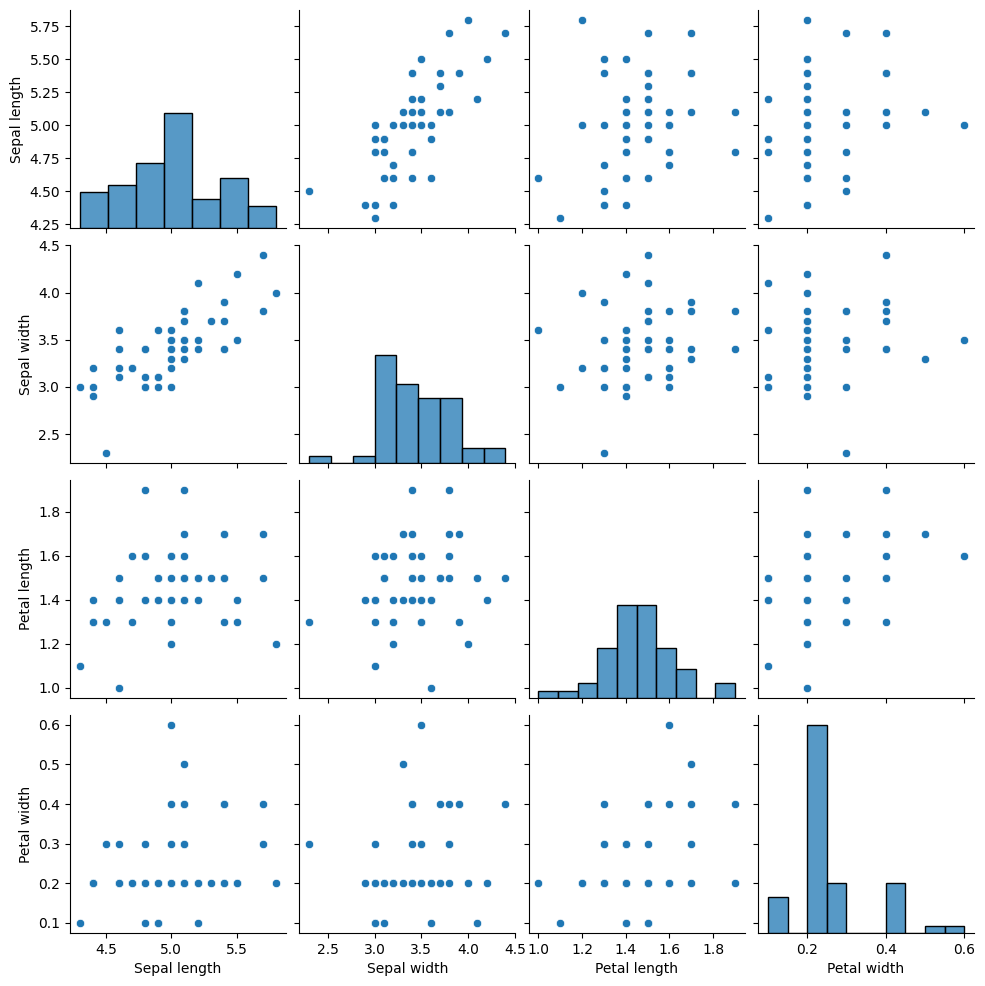

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [31]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width','Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()
d

### Compute mean for each axis and subtract from data

In [17]:
mn = np.mean(x, axis=0)
data = x - mn
data

array([[ -1.71659919,   7.41329285,  -9.15991903,  -5.45985155,
         -7.49865047, -13.48211876],
       [ -1.71659919,   7.41329285,  -9.15991903,  -5.45985155,
         -7.49865047, -13.48211876],
       [ -1.71659919,   7.41329285,  -9.15991903,  -5.45985155,
         -7.49865047, -13.48211876],
       ...,
       [  1.28340081,   5.41329285,   5.84008097,  -5.45985155,
         13.50134953,  -8.48211876],
       [  1.28340081,   5.41329285,   5.84008097,  -5.45985155,
         13.50134953,  -8.48211876],
       [  1.28340081,   5.41329285,   5.84008097,  -5.45985155,
         13.50134953,  -8.48211876]])

### Generate covariance matrix $C_x$

In [18]:
data_t = np.transpose(data)
cov_data = (1 / (n_obs - 1)) * np.matmul(data_t, data)
cov_data

array([[161.57743615, 129.21222882,  79.19990955,  70.43444998,
         84.8723815 ,  85.04353012],
       [129.21222882, 163.7707446 ,  49.27603807,  40.00516981,
         61.48965468,  75.84967785],
       [ 79.19990955,  49.27603807, 165.51407303, 139.88289921,
        130.41972314,  72.94683622],
       [ 70.43444998,  40.00516981, 139.88289921, 141.12393599,
        110.81145441,  71.27366592],
       [ 84.8723815 ,  61.48965468, 130.41972314, 110.81145441,
        164.81100054,  63.74634778],
       [ 85.04353012,  75.84967785,  72.94683622,  71.27366592,
         63.74634778, 142.99428022]])

In [19]:
cov_data_np = np.cov(data.T)
cov_data_np

array([[161.57743615, 129.21222882,  79.19990955,  70.43444998,
         84.8723815 ,  85.04353012],
       [129.21222882, 163.7707446 ,  49.27603807,  40.00516981,
         61.48965468,  75.84967785],
       [ 79.19990955,  49.27603807, 165.51407303, 139.88289921,
        130.41972314,  72.94683622],
       [ 70.43444998,  40.00516981, 139.88289921, 141.12393599,
        110.81145441,  71.27366592],
       [ 84.8723815 ,  61.48965468, 130.41972314, 110.81145441,
        164.81100054,  63.74634778],
       [ 85.04353012,  75.84967785,  72.94683622,  71.27366592,
         63.74634778, 142.99428022]])

### Determine principal components (eigenvectors) of $C_x$

In [20]:
values, vectors = np.linalg.eig(cov_data)

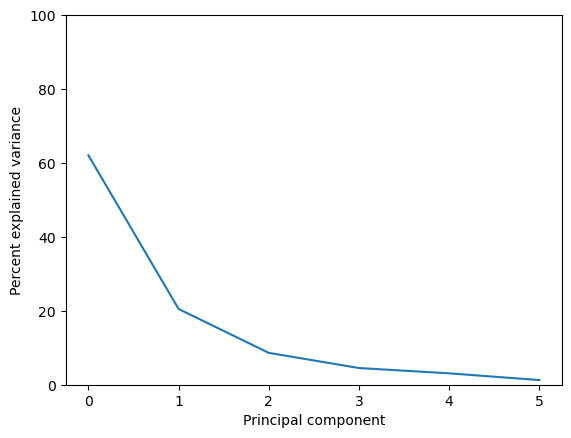

In [21]:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])
plt.show()

Try to use seaborns pairplot with the projected data? How does the covariance
structure look like?

There appears to be much less correlation between data dimensions after projecting onto the PCA space

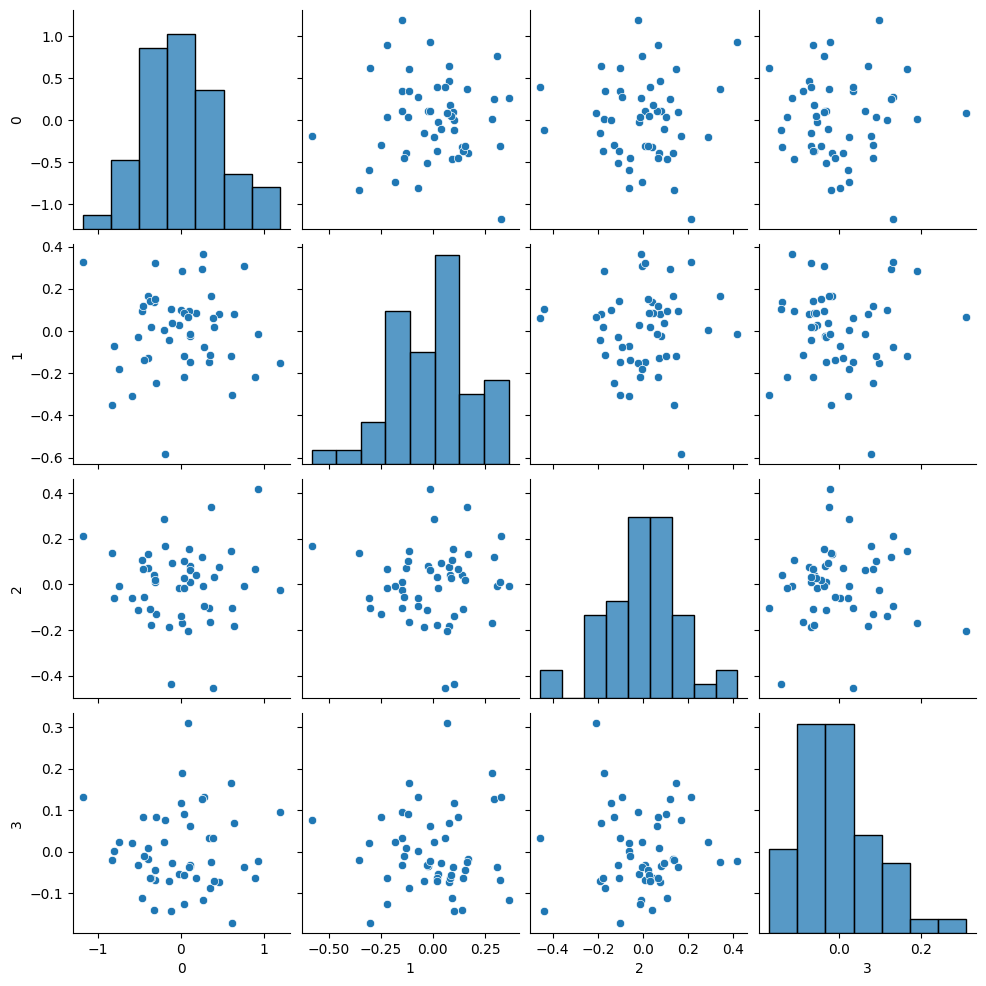

In [47]:
pc_proj = vectors.T.dot(data.T)
d0 = pd.DataFrame(pc_proj.T)
sns.pairplot(d0)

In [12]:
from sklearn import decomposition
# x is a matrix with 50 rows and 4 columns
#x0 = iris_data[0:50, 0:4]

In [23]:
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_
data_transform = pca.transform(x)
data_transform.max()

106.0788306004905

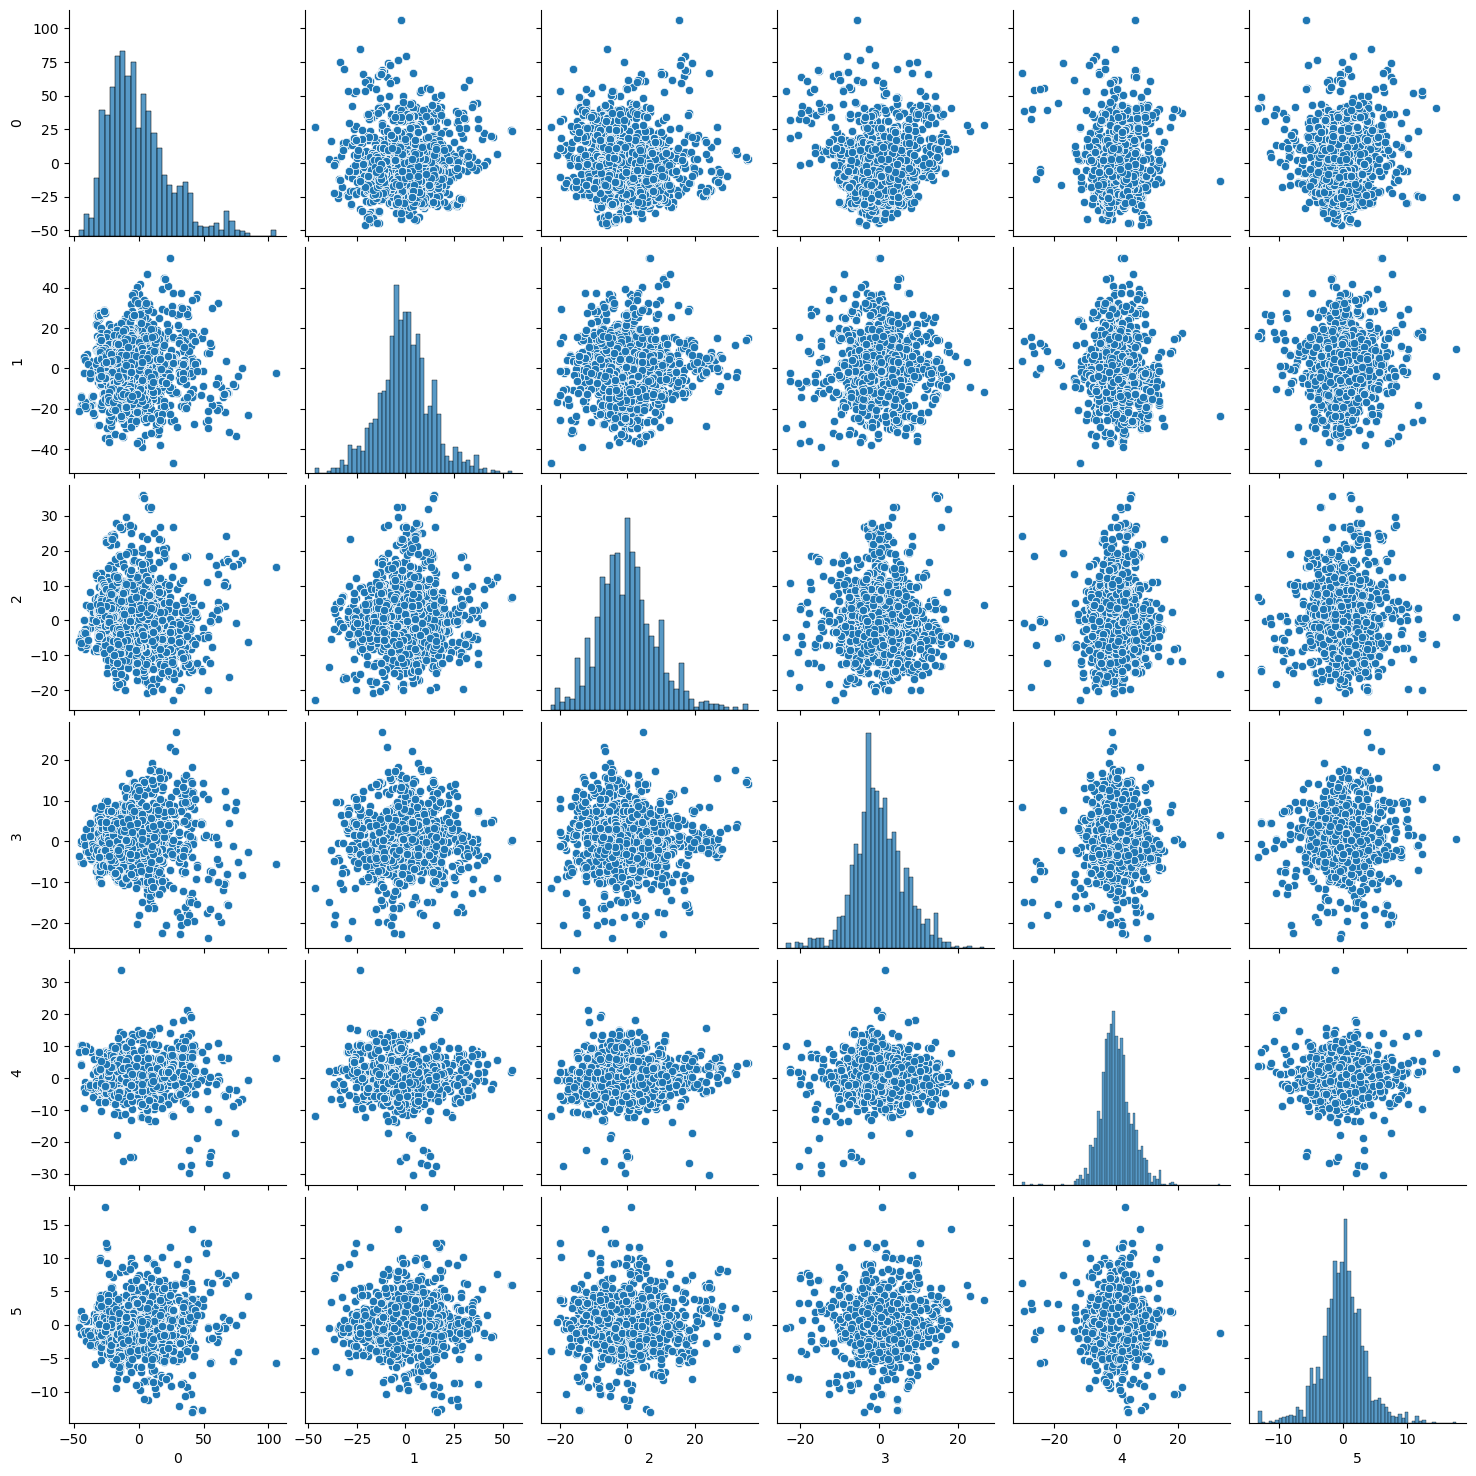

In [15]:
data_PCA = pd.DataFrame(data_transform)
data_PCA
sns.pairplot(data_PCA)